In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
data.count()


Sex               4177
Length            4177
Diameter          4177
Height            4177
Whole weight      4177
Shucked weight    4177
Viscera weight    4177
Shell weight      4177
Rings             4177
dtype: int64

In [6]:
data.shape

(4177, 9)

In [7]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [11]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [13]:
data.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
dtype: int64

In [14]:
data['Sex'].unique()


array(['M', 'F', 'I'], dtype=object)

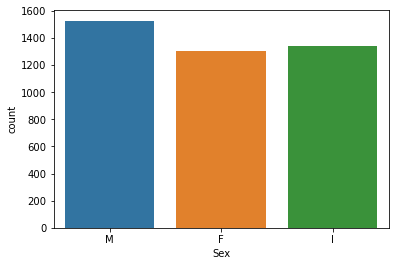

In [16]:
sns.countplot(x='Sex',data=data)
plt.show()

There are more male Abalones compare to Female and infant.

In [17]:
numeric_features = data.select_dtypes(include=[np.number])
correlation = numeric_features.corr()

In [18]:
print(correlation['Rings'].sort_values(ascending=False))


Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Name: Rings, dtype: float64


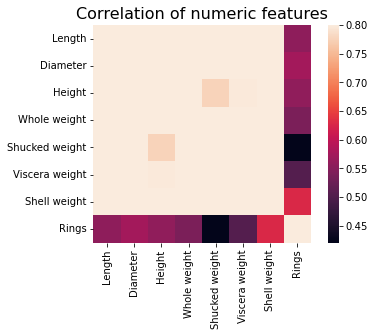

In [20]:
plt.title('Correlation of numeric features', y=1,size=16)
sns.heatmap(correlation,square=True,vmax=0.8)
plt.show()

It appears that Shell weight is the only feature that has a correlation above 0.50. All the other features linger around 0.42 - 0.51.



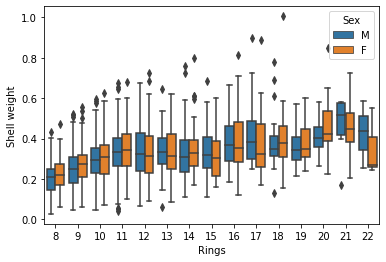

In [22]:
f = (data.loc[data['Sex'].isin(['M','F'])]
      .loc[:,['Shell weight','Rings','Sex']])

f = f[f["Rings"] >= 8]
f = f[f["Rings"] < 23]
sns.boxplot(x="Rings",y="Shell weight", hue='Sex',data=f)
plt.show()

This box plot allows us to clearly visualize the presence of outliers.

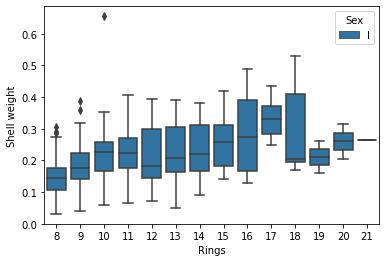

In [23]:
w = (data.loc[data['Sex'].isin(['I'])]
    .loc[:,['Shell weight','Rings','Sex']])
w = w[w["Rings"] >= 8]
w = w[w["Rings"] < 23]
sns.boxplot(x="Rings",y="Shell weight", hue='Sex',data=w)
plt.show()

there is only one signifincant outlier while it is clear that infants have Rings in the range of 8 -21.



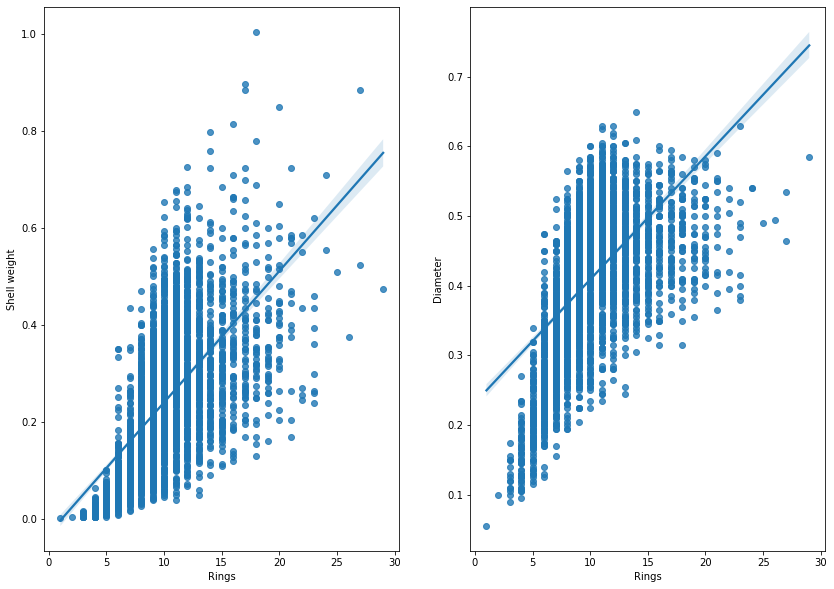

In [25]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(14,10))

ShellWeight_plot = pd.concat([data['Rings'],data['Shell weight']],axis=1)
sns.regplot(x='Rings',y='Shell weight',data=ShellWeight_plot,scatter=True,fit_reg=True,ax=ax1)

Diameter_plot = pd.concat([data['Rings'],data['Diameter']],axis=1)
sns.regplot(x='Rings',y='Diameter',data=Diameter_plot,scatter=True,fit_reg=True,ax=ax2)
plt.show()

In [26]:
from scipy import stats
z= np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
print(z)

        Length  Diameter    Height  Whole weight  Shucked weight  \
0     0.574558  0.432149  1.064424      0.641898        0.607685   
1     1.448986  1.439929  1.183978      1.230277        1.170910   
2     0.050033  0.122130  0.107991      0.309469        0.463500   
3     0.699476  0.432149  0.347099      0.637819        0.648238   
4     1.615544  1.540707  1.423087      1.272086        1.215968   
...        ...       ...       ...           ...             ...   
4172  0.341509  0.424464  0.609334      0.118813        0.047908   
4173  0.549706  0.323686  0.107991      0.279929        0.358808   
4174  0.632985  0.676409  1.565767      0.708212        0.748559   
4175  0.841182  0.777187  0.250672      0.541998        0.773341   
4176  1.549052  1.482634  1.326659      2.283681        2.640993   

      Viscera weight  Shell weight     Rings  
0           0.726212      0.638217  1.571544  
1           1.205221      1.212987  0.910013  
2           0.356690      0.207139  0.2896

In [28]:
data_o = data[(z < 3).all(axis=1)]

In [29]:
print("Shape of Abalones with outliers: "+ str(data.shape) , 
      "Shape of Abalones without outliers: " + str(data_o.shape))

Shape of Abalones with outliers: (4177, 9) Shape of Abalones without outliers: (4027, 9)


In [30]:
Xtrain = data.drop(['Rings','Sex'], axis = 1)
Ytrain = data['Rings']

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [32]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
result_acc = accuracy_score(Y_test,Y_pred) 

In [33]:
result_acc

0.2654097171863669

In [34]:
data['newRings'] = np.where(data['Rings'] > 10,1,0)

In [35]:
Xtrain = data.drop(['newRings','Rings','Sex'], axis = 1)
Ytrain = data['newRings']

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [37]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
result_acc = accuracy_score(Y_test,Y_pred) 

In [38]:
result_acc

0.7592458303118201

In [39]:
from sklearn import svm

In [40]:
Xtrain = data.drop(['Rings','Sex'], axis = 1)
Ytrain = data['Rings']

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [42]:
svmModel = svm.SVC(kernel='linear', C=1, gamma=1) 
svmModel.fit(X_train, Y_train)
Y_pred = svmModel.predict(X_test)
result_acc = accuracy_score(Y_test,Y_pred) 

In [43]:
result_acc


0.3734590282813633

Lets Try to reduce the number of classes and see how the model is performing

In [44]:
new_df = data.copy()

In [45]:
new_df['newRings_1'] = np.where(data['Rings'] <= 8,1,0)
new_df['newRings_2'] = np.where(((data['Rings'] > 8) & (data['Rings'] <= 10)), 2,0)
new_df['newRings_3'] = np.where(data['Rings'] > 10,3,0)

In [46]:
new_df['newRings'] = new_df['newRings_1'] + new_df['newRings_2'] + new_df['newRings_3']

In [47]:
Xtrain = new_df.drop(['Rings','Sex','newRings_1','newRings_2','newRings_3'], axis = 1)
Ytrain = new_df['newRings']

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [49]:
svmModel = svm.SVC(kernel='rbf', C=1, gamma=100) 
svmModel.fit(X_train, Y_train)
Y_pred = svmModel.predict(X_test)
result_acc = accuracy_score(Y_test,Y_pred) 

In [50]:
result_acc

0.9891225525743292